# Bibliotecas

In [199]:
# ! pip install pmdarima
# ! pip install ptitprince
# ! pip install pandas -U

In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (mean_squared_error,
                             r2_score,
                             mean_absolute_error)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from math import sqrt

In [201]:
np.random.seed(31)

# Dataset

Target: Vibration (predict the absolute value of vibration)

In [202]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/predictive-maintenance-dataset.csv',
                 sep=',',
                 encoding='utf-8')

len_df = len(df)

In [203]:
t_stamp = pd.date_range(start='2022-01-01 16:30:00',
                        end='2022-01-01 19:30:00',
                        periods=len_df)

In [204]:
df.index = pd.to_datetime(t_stamp,
                          format='%Y-%m-%d %H:%M:%S%f')

df.drop(columns='ID', inplace=True)

In [205]:
df.head(10)

,revolutions,humidity,vibration,x1,x2,x3,x4,x5
2022-01-01 16:30:00.000000000,93.744,73.999,18.00,167.743,19.745,1.266828,8787.937536,5475.852001
2022-01-01 16:30:00.096428571,93.740,73.999,18.00,167.739,19.741,1.266774,8787.187600,5475.852001
2022-01-01 16:30:00.192857142,93.736,73.998,18.00,167.734,19.738,1.266737,8786.437696,5475.704004
2022-01-01 16:30:00.289285714,93.732,73.998,18.00,167.730,19.734,1.266683,8785.687824,5475.704004
2022-01-01 16:30:00.385714285,93.729,73.998,18.00,167.727,19.731,1.266642,8785.125441,5475.704004
2022-01-01 16:30:00.482142857,93.725,73.997,18.01,167.722,19.728,1.266605,8784.375625,5475.556009
2022-01-01 16:30:00.578571428,93.721,73.997,18.01,167.718,19.724,1.266551,8783.625841,5475.556009
2022-01-01 16:30:00.675000000,93.717,73.997,18.01,167.714,19.720,1.266497,8782.876089,5475.556009
2022-01-01 16:30:00.771428571,93.713,73.996,18.01,167.709,19.717,1.266460,8782.126369,5475.408016
2022-01-01 16:30:00.867857142,93.709,73.996,18.01,167.705,19.713,1.266406,8781.376681,5475.408016


In [206]:
df.isnull().sum()

revolutions       0
humidity          0
vibration      2438
x1                0
x2                0
x3                0
x4                0
x5                0
dtype: int64

In [207]:
df.interpolate(method='linear', inplace=True)

df.isnull().sum()

revolutions    0
humidity       0
vibration      0
x1             0
x2             0
x3             0
x4             0
x5             0
dtype: int64

## Correlação

In [208]:
df.corr().round(3)

,revolutions,humidity,vibration,x1,x2,x3,x4,x5
revolutions,1.000,-0.101,-0.110,0.999,0.999,1.000,0.983,-0.099
humidity,-0.101,1.000,0.137,-0.066,-0.137,-0.129,-0.208,1.000
vibration,-0.110,0.137,1.000,-0.106,-0.115,-0.113,-0.138,0.138
x1,0.999,-0.066,-0.106,1.000,0.997,0.998,0.978,-0.063
x2,0.999,-0.137,-0.115,0.997,1.000,1.000,0.986,-0.134
x3,1.000,-0.129,-0.113,0.998,1.000,1.000,0.985,-0.126
x4,0.983,-0.208,-0.138,0.978,0.986,0.985,1.000,-0.205
x5,-0.099,1.000,0.138,-0.063,-0.134,-0.126,-0.205,1.000


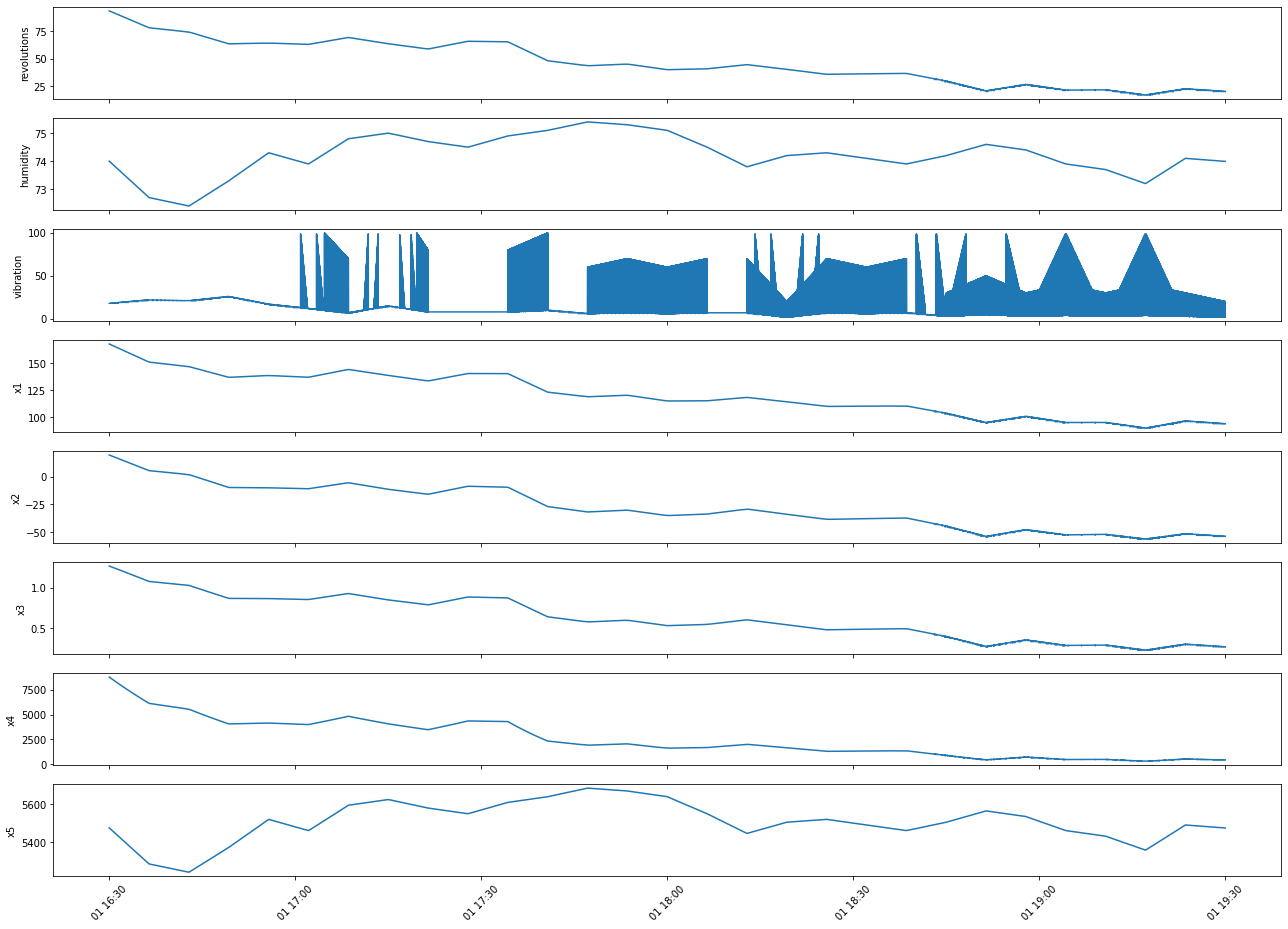

In [209]:
fig, ax = plt.subplots(nrows=8, sharex=True)
fig.set_size_inches(22, 16)

ax[0].plot('revolutions', data=df)
ax[0].set_ylabel('revolutions')

ax[1].plot('humidity', data=df)
ax[1].set_ylabel('humidity')

ax[2].plot('vibration', data=df)
ax[2].set_ylabel('vibration')

ax[3].plot('x1', data=df)
ax[3].set_ylabel('x1')

ax[4].plot('x2', data=df)
ax[4].set_ylabel('x2')

ax[5].plot('x3', data=df)
ax[5].set_ylabel('x3')

ax[6].plot('x4', data=df)
ax[6].set_ylabel('x4')

ax[7].plot('x5', data=df)
ax[7].set_ylabel('x5')
ax[7].tick_params(axis='x', rotation=45)

# Treino e teste

## ['humidity', 'x1']

In [210]:
y = df['vibration']

X = df[['humidity', 'x1']]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3)

## Modeo de regressão

In [211]:
modelo = LinearRegression()

modelo.fit(X_train, y_train)

LinearRegression()

In [212]:
y_pred = modelo.predict(X_test)

# Dataset com previsões

In [213]:
df['pred_vibr_x1'] = modelo.predict(df[['humidity', 'x1']])

### Acurácia

In [214]:
r_squared_x1 = r2_score(y_test, y_pred)

r_squared_x1

0.02693679187299103

In [215]:
rmse_x1 = sqrt(mean_squared_error(y_test, y_pred))

rmse_x1

24.19824242792091

In [216]:
mae_x1 = mean_absolute_error(y_test, y_pred)

mae_x1

19.69623269017851

# Treino e teste

## ['humidity', 'x2']

In [217]:
y = df['vibration']

X = df[['humidity', 'x2']]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3)

## Modeo de regressão

In [218]:
modelo = LinearRegression()

modelo.fit(X_train, y_train)

LinearRegression()

In [219]:
y_pred = modelo.predict(X_test)

# Dataset com previsões

In [220]:
df['pred_vibr_x2'] = modelo.predict(df[['humidity', 'x2']])

### Acurácia

In [221]:
r_squared_x2 = r2_score(y_test, y_pred)

r_squared_x2

0.028266975340019096

In [222]:
rmse_x2 = sqrt(mean_squared_error(y_test, y_pred))

rmse_x2

24.19858906662233

In [223]:
mae_x2 = mean_absolute_error(y_test, y_pred)

mae_x2

19.617907914913733

# Treino e teste

## ['humidity', 'x3']

In [224]:
y = df['vibration']

X = df[['humidity', 'x3']]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3)

## Modeo de regressão

In [225]:
modelo = LinearRegression()

modelo.fit(X_train, y_train)

LinearRegression()

In [226]:
y_pred = modelo.predict(X_test)

# Dataset com previsões

In [227]:
df['pred_vibr_x3'] = modelo.predict(df[['humidity', 'x3']])

### Acurácia

In [228]:
r_squared_x3 = r2_score(y_test, y_pred)

r_squared_x3

0.028693376596019782

In [229]:
rmse_x3 = sqrt(mean_squared_error(y_test, y_pred))

rmse_x3

24.21885996181508

In [230]:
mae_x3 = mean_absolute_error(y_test, y_pred)

mae_x3

19.639005649004677

# Treino e teste

## ['humidity', 'x4']

In [231]:
y = df['vibration']

X = df[['humidity', 'x4']]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3)

## Modeo de regressão

In [232]:
modelo = LinearRegression()

modelo.fit(X_train, y_train)

LinearRegression()

In [233]:
y_pred = modelo.predict(X_test)

# Dataset com previsões

In [234]:
df['pred_vibr_x4'] = modelo.predict(df[['humidity', 'x4']])

### Acurácia

In [235]:
r_squared_x4 = r2_score(y_test, y_pred)

r_squared_x4

0.03151916470808924

In [236]:
rmse_x4 = sqrt(mean_squared_error(y_test, y_pred))

rmse_x4

24.13383288026449

In [237]:
mae_x4 = mean_absolute_error(y_test, y_pred)

mae_x4

19.580142627798274

# Treino e teste

## ['revolutions', 'x5']

In [238]:
y = df['vibration']

X = df[['revolutions', 'x5']]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3)

## Modeo de regressão

In [239]:
modelo = LinearRegression()

modelo.fit(X_train, y_train)

LinearRegression()

In [240]:
y_pred = modelo.predict(X_test)

# Dataset com previsões

In [241]:
df['pred_vibr_x5'] = modelo.predict(df[['revolutions', 'x5']])

### Acurácia

In [242]:
r_squared_x5 = r2_score(y_test, y_pred)

r_squared_x5

0.027363163004687552

In [243]:
rmse_x5 = sqrt(mean_squared_error(y_test, y_pred))

rmse_x5

24.102602589754937

In [244]:
mae_x5 = mean_absolute_error(y_test, y_pred)

mae_x5

19.609812512809047

# Comparativo

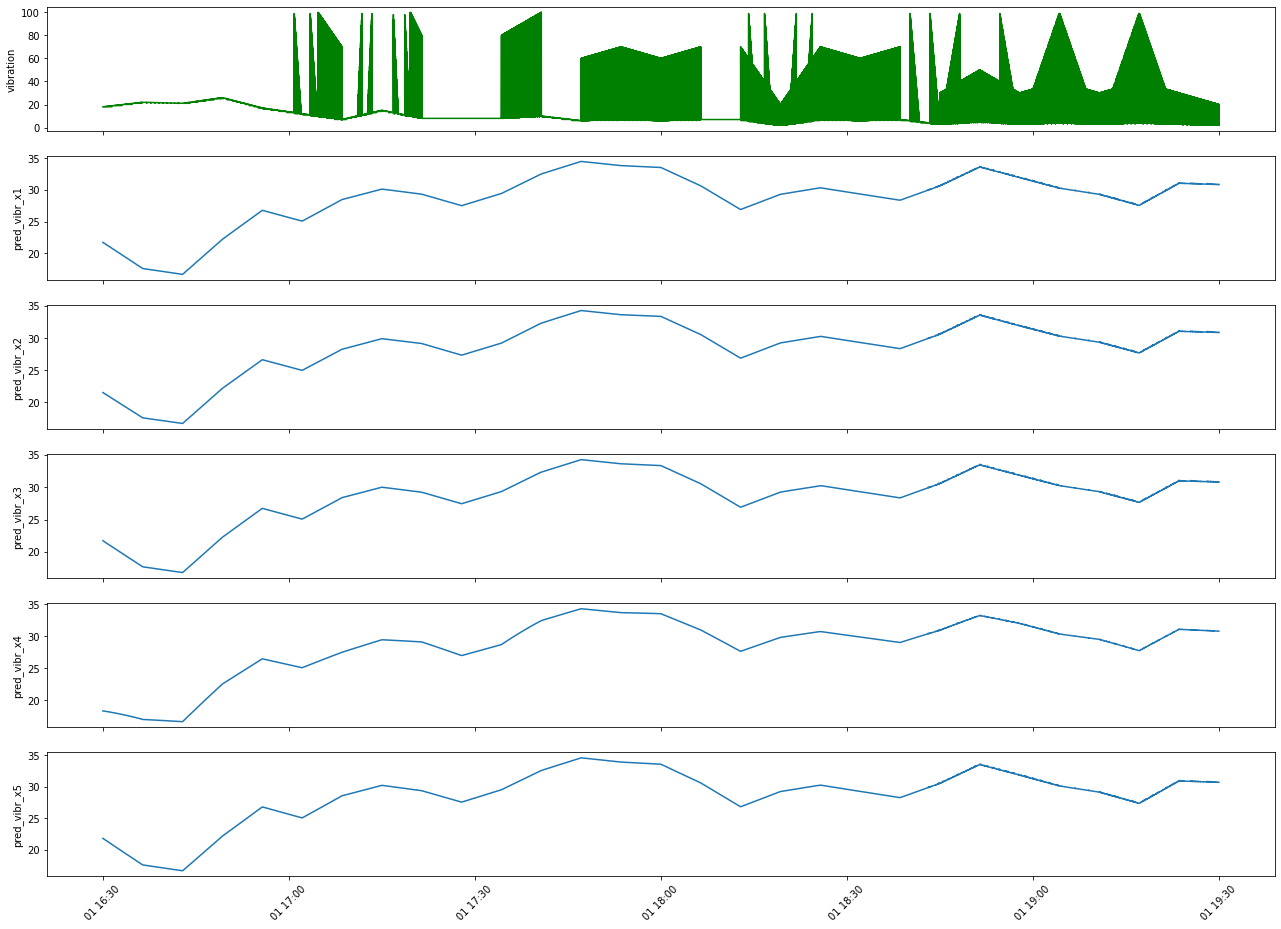

In [245]:
fig, ax = plt.subplots(nrows=6, sharex=True)
fig.set_size_inches(22, 16)

ax[0].plot('vibration', data=df, color='green')
ax[0].set_ylabel('vibration')

ax[1].plot('pred_vibr_x1', data=df)
ax[1].set_ylabel('pred_vibr_x1')

ax[2].plot('pred_vibr_x2', data=df)
ax[2].set_ylabel('pred_vibr_x2')

ax[3].plot('pred_vibr_x3', data=df)
ax[3].set_ylabel('pred_vibr_x3')

ax[4].plot('pred_vibr_x4', data=df)
ax[4].set_ylabel('pred_vibr_x4')

ax[5].plot('pred_vibr_x5', data=df)
ax[5].set_ylabel('pred_vibr_x5')
ax[5].tick_params(axis='x', rotation=45)

# Dataset acurácia

In [246]:
d = {'rmse': [rmse_x1, rmse_x2, rmse_x3, rmse_x4, rmse_x5],
     'mae': [mae_x1, mae_x2, mae_x3, mae_x4, mae_x5],
     'r_squared': [r_squared_x1, r_squared_x2, r_squared_x3, r_squared_x4, r_squared_x5]}

index = ['pred_x1', 'pred_x2', 'pred_x3', 'pred_x4', 'pred_x5']

In [247]:
df_score = pd.DataFrame(data=d,
                        index=index)

In [248]:
df_score

,rmse,mae,r_squared
pred_x1,24.198242,19.696233,0.026937
pred_x2,24.198589,19.617908,0.028267
pred_x3,24.218860,19.639006,0.028693
pred_x4,24.133833,19.580143,0.031519
pred_x5,24.102603,19.609813,0.027363


In [249]:
df_comparative = df[['vibration',
                     'pred_vibr_x1',
                     'pred_vibr_x2',
                     'pred_vibr_x3',
                     'pred_vibr_x4',
                     'pred_vibr_x5']].copy()

In [250]:
# df_comparative['error_x1'] = df['vibration'] - df['pred_vibr_x1']

# df_comparative['error_x2'] = df['vibration'] - df['pred_vibr_x2']

# df_comparative['error_x3'] = df['vibration'] - df['pred_vibr_x3']

# df_comparative['error_x4'] = df['vibration'] - df['pred_vibr_x4']

# df_comparative['error_x5'] = df['vibration'] - df['pred_vibr_x5']

In [251]:
df_comparative.insert(2, 'error_x1', df['vibration'] - df['pred_vibr_x1'])

df_comparative.insert(3, 'error_x2', df['vibration'] - df['pred_vibr_x2'])

df_comparative.insert(6, 'error_x3', df['vibration'] - df['pred_vibr_x3'])

df_comparative.insert(8, 'error_x4', df['vibration'] - df['pred_vibr_x4'])

df_comparative.insert(10, 'error_x5', df['vibration'] - df['pred_vibr_x5'])

In [252]:
df_comparative

,vibration,pred_vibr_x1,error_x1,error_x2,pred_vibr_x2,pred_vibr_x3,error_x3,pred_vibr_x4,error_x4,pred_vibr_x5,error_x5
2022-01-01 16:30:00.000000000,18.00,21.728883,-3.728883,-3.544198,21.544198,21.741366,-3.741366,18.312146,-0.312146,21.835913,-3.835913
2022-01-01 16:30:00.096428571,18.00,21.729380,-3.729380,-3.544707,21.544707,21.741860,-3.741860,18.313266,-0.313266,21.836396,-3.836396
2022-01-01 16:30:00.192857142,18.00,21.725226,-3.725226,-3.540678,21.540678,21.737758,-3.737758,18.310304,-0.310304,21.832161,-3.832161
2022-01-01 16:30:00.289285714,18.00,21.725722,-3.725722,-3.541187,21.541187,21.738252,-3.738252,18.311424,-0.311424,21.832644,-3.832644
2022-01-01 16:30:00.385714285,18.00,21.726094,-3.726094,-3.541569,21.541569,21.738623,-3.738623,18.312264,-0.312264,21.833007,-3.833007
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01 19:29:59.614285714,2.00,30.826472,-28.826472,-28.872058,30.872058,30.794552,-28.794552,30.800425,-28.800425,30.696954,-28.696954
2022-01-01 19:29:59.710714285,20.01,30.826472,-10.816472,-10.862058,30.872058,30.794552,-10.784552,30.800425,-10.790425,30.696954,-10.686954
2022-01-01 19:29:59.807142857,20.01,30.826597,-10.816597,-10.862185,30.872185,30.794676,-10.784676,30.800486,-10.790486,30.697075,-10.687075
2022-01-01 19:29:59.903571428,20.00,30.826597,-10.826597,-10.872185,30.872185,30.794676,-10.794676,30.800486,-10.800486,30.697075,-10.697075
